In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

dp=pd.read_csv("kc_house_data.csv")
dp

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
dp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
print("Total of missing values in the data set : ",dp.isnull().sum().sum())

Total of missing values in the data set :  0


In [6]:
dp.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
dp.head(15)

id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000.0         2       1.00         1160   
12   114101516  20140528T000000   310000.0         3       1.00         1430   
13  6054650070  20141007T000000   400000.0         3       1.75         1370   
14  1175000570  20150312T000000   530000.0         5       2.00         1810   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0           0     0  ...      7        1180              0   
1       7242     2.0           0     0  ...      7        2170            400   
2      10000     1.0           0     0  ...      6         770              0   
3       5000     1.0           0     0  ...      7        1050            910   
4       8080     1.0           0     0  ...      8        1680              0   
5     101930     1.0           0     0  ...     11        3890           1530   
6       6819     2.0           0     0  ...      7        1715              0   
7       9711     1.0           0     0  ...      7        1060              0   
8       7470     1.0           0     0  ...      7        1050            730   
9       6560     2.0           0     0  ...      7        1890              0   
10      9796     1.0           0     0  ...      8        1860           1700   
11      6000     1.0           0     0  ...      7         860            300   
12     19901     1.5           0     0  ...      7        1430              0   
13      9680     1.0           0     0  ...      7        1370              0   
14      4850     1.5           0     0  ...      7        1810              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0       1955             0    98178  47.5112 -122.257           1340   
1       1951          1991    98125  47.7210 -122.319           1690   
2       1933             0    98028  47.7379 -122.233           2720   
3       1965             0    98136  47.5208 -122.393           1360   
4       1987             0    98074  47.6168 -122.045           1800   
5       2001             0    98053  47.6561 -122.005           4760   
6       1995             0    98003  47.3097 -122.327           2238   
7       1963             0    98198  47.4095 -122.315           1650   
8       1960             0    98146  47.5123 -122.337           1780   
9       2003             0    98038  47.3684 -122.031           2390   
10      1965             0    98007  47.6007 -122.145           2210   
11      1942             0    98115  47.6900 -122.292           1330   
12      1927             0    98028  47.7558 -122.229           1780   
13      1977             0    98074  47.6127 -122.045           1370   
14      1900             0    98107  47.6700 -122.394           1360   

    sqft_lot15  
0         5650  
1         7639  
2         8062  
3         5000  
4         7503  
5       101930  
6         6819  
7         9711  
8         8113  
9         7570  
10        8925  
11        6000  
12       12697  
13       10208  
14        4850  

[15 rows

In [8]:
dp.drop('id',axis=1,inplace=True)

In [9]:
dp['date'] = pd.to_datetime(dp['date'])
dp

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 20 columns]

In [10]:
dp['Month'] = dp['date'].apply(lambda date: date.month)
dp['Year'] = dp['date'].apply(lambda date: date.year)
dp

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
0         1.0           0     0          3  ...              0      1955   
1         2.0           0     0          3  ...            400      1951   
2         1.0           0     0          3  ...              0      1933   
3         1.0           0     0          5  ...            910      1965   
4         1.0           0     0          3  ...              0      1987   
...       ...         ...   ...        ...  ...            ...       ...   
21608     3.0           0     0          3  ...              0      2009   
21609     2.0           0     0          3  ...              0      2014   
21610     2.0           0     0          3  ...              0      2009   
21611     2.0           0     0          3  ...              0      2004   
21612     2.0           0     0          3  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608             0    98103  47.6993 -122.346           1530        1509   
21609             0    98146  47.5107 -122.362           1830        7200   
21610             0    98144  47.5944 -122.299           1020        2007   
21611             0    98027  47.5345 -122.069           1410        1287   
21612             0    98144  47.5941 -122.299           1020        1357   

       Month  Year  
0         10  2014  
1         12  2014  
2          2  2015  
3         12  2014  
4          2  2015  
...      ...   ...  
21608      5  2014  
21609      2  2015  
21610      6  2014  
21611      1  2015  
21612     10  2014  

[21613 rows x 22 columns]

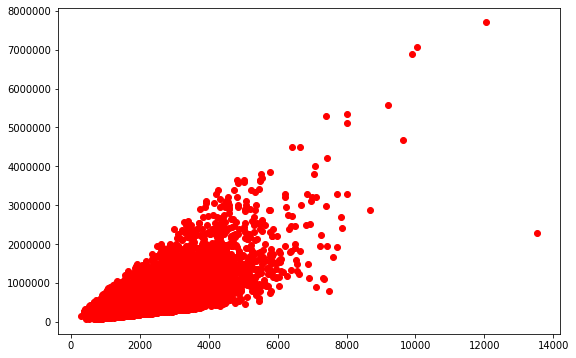

In [11]:
plt.figure(figsize=(9,6))
plt.plot(dp["sqft_living"],dp["price"],"ro")

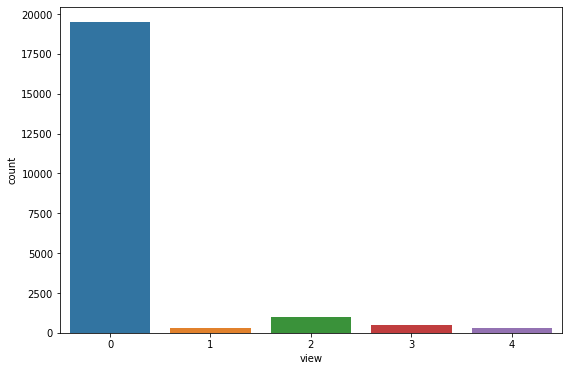

In [12]:
plt.figure(figsize=(9,6))
sns.countplot(x='view',data=dp)

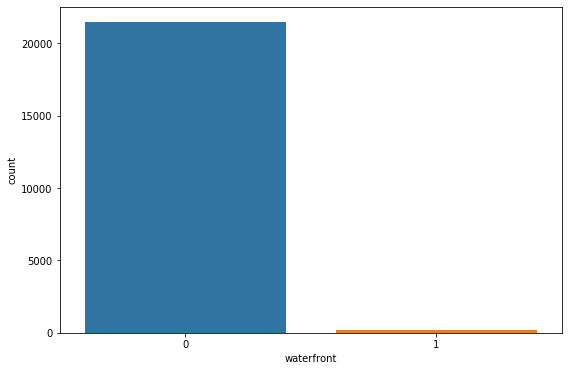

In [13]:
plt.figure(figsize=(9,6))
sns.countplot(x='waterfront',data=dp)

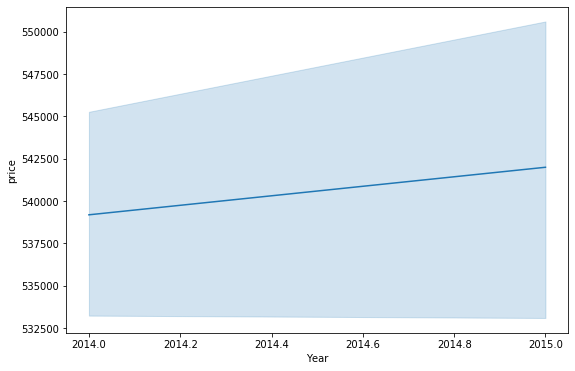

In [14]:
plt.figure(figsize=(9,6))
sns.lineplot(x='Year',y='price',data=dp)

Evaluation of the houeses prices through years, we can see that the prices went up from 2014 to 2015.

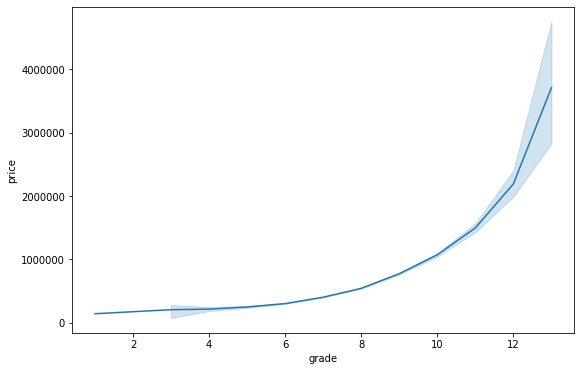

In [15]:
plt.figure(figsize=(9,6))
sns.lineplot(x='grade',y='price',data=dp,palette='terrain')

correlation between grade and prices : 
we can see that the higher the grade of house is, the higher its price is, which means that there is a positive correlation between the grade and the price.

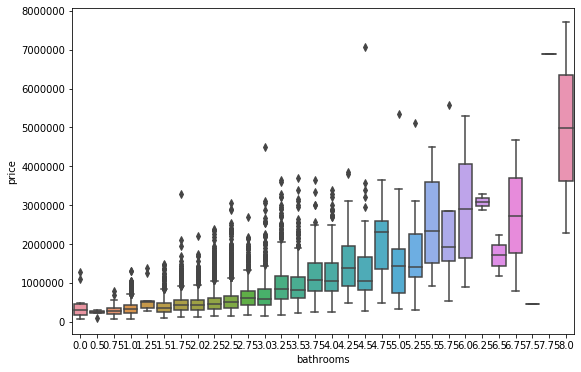

In [16]:
plt.figure(figsize=(9,6))
sns.boxplot(x='bathrooms',y='price',data=dp)

This figure shows us the range of the prices of the houses grouped by the number of bathrooms they have.
We can interpret from this figure that the number of bathrooms play an important role in increasing the price of the house.

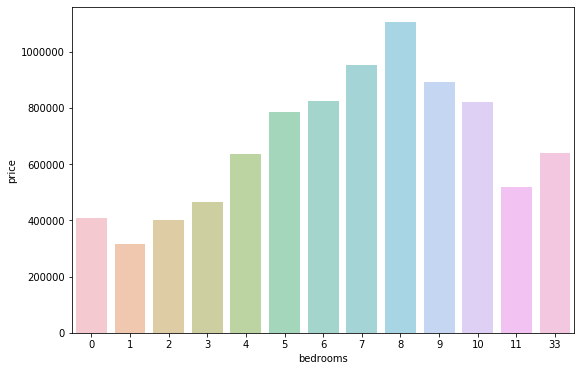

In [17]:
plt.figure(figsize=(9,6))
sns.barplot("bedrooms", 'price', alpha=.5, ci=None,data=dp)

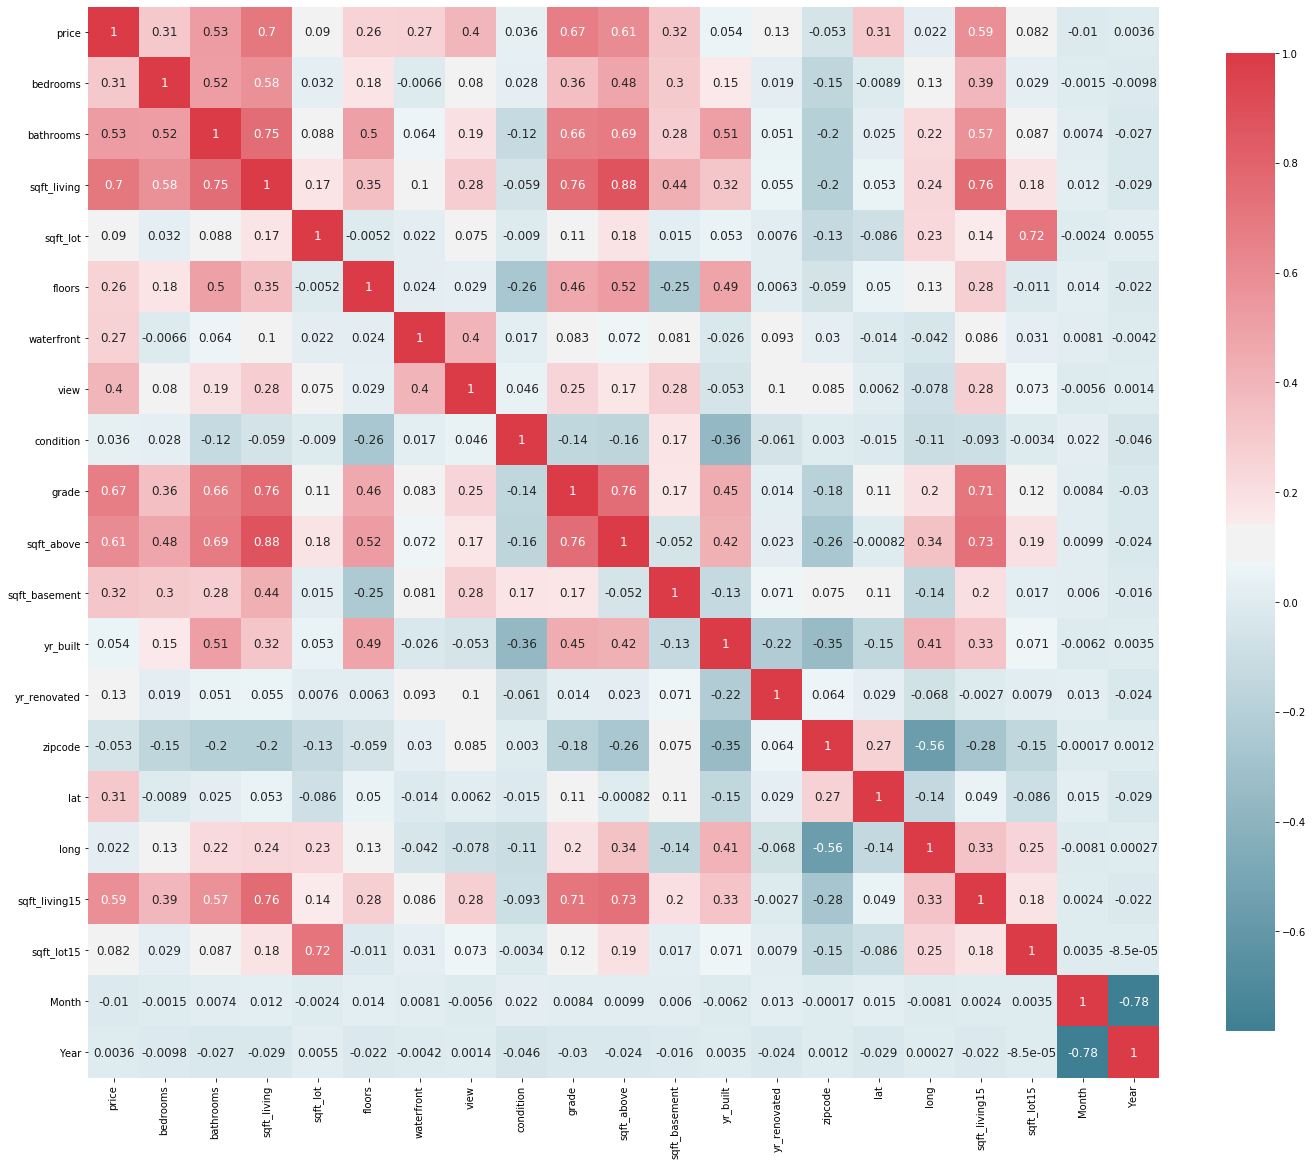

In [18]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots(figsize =( 24, 20 ))
    cmap = sns.diverging_palette(220,10,as_cmap = True)
    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws = {'shrink':.9}, ax = ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(dp)

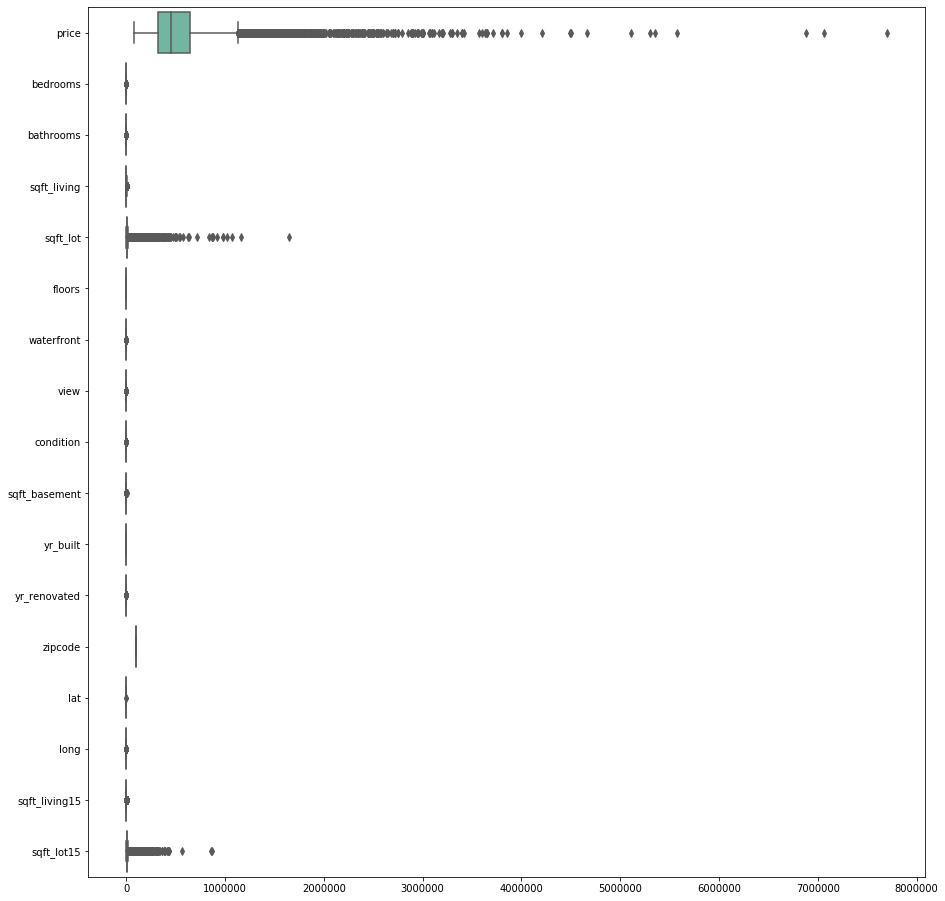

In [19]:
plt.figure(figsize=(15,16))
g=sns.boxplot(data=dp[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]], orient="h", palette="Set2")

In [20]:
from sklearn.preprocessing import StandardScaler
df=dp.drop('date',axis=1,inplace=False)
scaler = StandardScaler()
df = scaler.fit_transform(df) 
liste= dp.columns
liste= liste.tolist()
liste.remove("date")
df= pd.DataFrame(df, columns=liste)
df

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0     -0.866717 -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   
1     -0.005688 -0.398737   0.175607     0.533634 -0.189885  0.936506   
2     -0.980849 -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   
3      0.174090  0.676485   1.149449    -0.130550 -0.244014 -0.915427   
4     -0.081958 -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   
...         ...       ...        ...          ...       ...       ...   
21608 -0.490545 -0.398737   0.500221    -0.598746 -0.337424  2.788439   
21609 -0.381588  0.676485   0.500221     0.250539 -0.224386  0.936506   
21610 -0.375865 -1.473959  -1.772078    -1.154047 -0.332137  0.936506   
21611 -0.381588 -0.398737   0.500221    -0.522528 -0.307076  0.936506   
21612 -0.585882 -1.473959  -1.772078    -1.154047 -0.338752  0.936506   

       waterfront      view  condition     grade  ...  sqft_basement  \
0       -0.087173 -0.305759  -0.629187 -0.558836  ...      -0.658681   
1       -0.087173 -0.305759  -0.629187 -0.558836  ...       0.245141   
2       -0.087173 -0.305759  -0.629187 -1.409587  ...      -0.658681   
3       -0.087173 -0.305759   2.444294 -0.558836  ...       1.397515   
4       -0.087173 -0.305759  -0.629187  0.291916  ...      -0.658681   
...           ...       ...        ...       ...  ...            ...   
21608   -0.087173 -0.305759  -0.629187  0.291916  ...      -0.658681   
21609   -0.087173 -0.305759  -0.629187  0.291916  ...      -0.658681   
21610   -0.087173 -0.305759  -0.629187 -0.558836  ...      -0.658681   
21611   -0.087173 -0.305759  -0.629187  0.291916  ...      -0.658681   
21612   -0.087173 -0.305759  -0.629187 -0.558836  ...      -0.658681   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
0     -0.544898     -0.210128  1.870152 -0.352572 -0.306079      -0.943355   
1     -0.681079      4.746678  0.879568  1.161568 -0.746341      -0.432686   
2     -1.293892     -0.210128 -0.933388  1.283537 -0.135655       1.070140   
3     -0.204446     -0.210128  1.085160 -0.283288 -1.271816      -0.914174   
4      0.544548     -0.210128 -0.073636  0.409550  1.199335      -0.272190   
...         ...           ...       ...       ...       ...            ...   
21608  1.293542     -0.210128  0.468382  1.004958 -0.938069      -0.666135   
21609  1.463768     -0.210128  1.272063 -0.356180 -1.051685      -0.228419   
21610  1.293542     -0.210128  1.234683  0.247888 -0.604321      -1.410253   
21611  1.123316     -0.210128 -0.952078 -0.184414  1.028910      -0.841221   
21612  1.259497     -0.210128  1.234683  0.245723 -0.604321      -1.410253   

       sqft_lot15     Month      Year  
0       -0.260715  1.099621 -0.690655  
1       -0.187868  1.741627 -0.690655  
2       -0.172375 -1.468403  1.447901  
3       -0.284522  1.741627 -0.690655  
4       -0.192849 -1.468403  1.447901  
...           ...       ...       ...  
21608   -0.412381 -0.505394 -0.690655  
21609   -0.203946 -1.468403  1.447901  
21610   -0.394141 -0.184391 -0.690655  
21611   -0.420511 -1.789406  1.447901  
21612   -0.417948  1.099621 -0.690655  

[21613 rows x 21 columns]

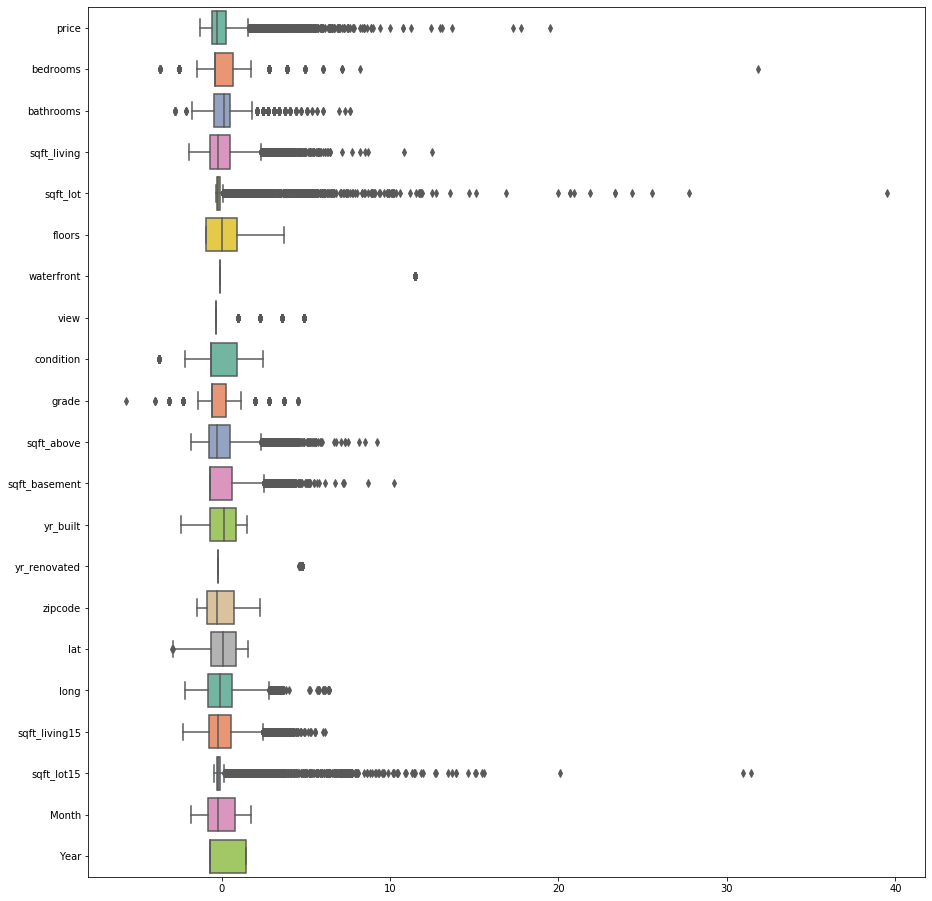

In [21]:
plt.figure(figsize=(15,16))
sns.boxplot(data=df, orient="h", palette="Set2")

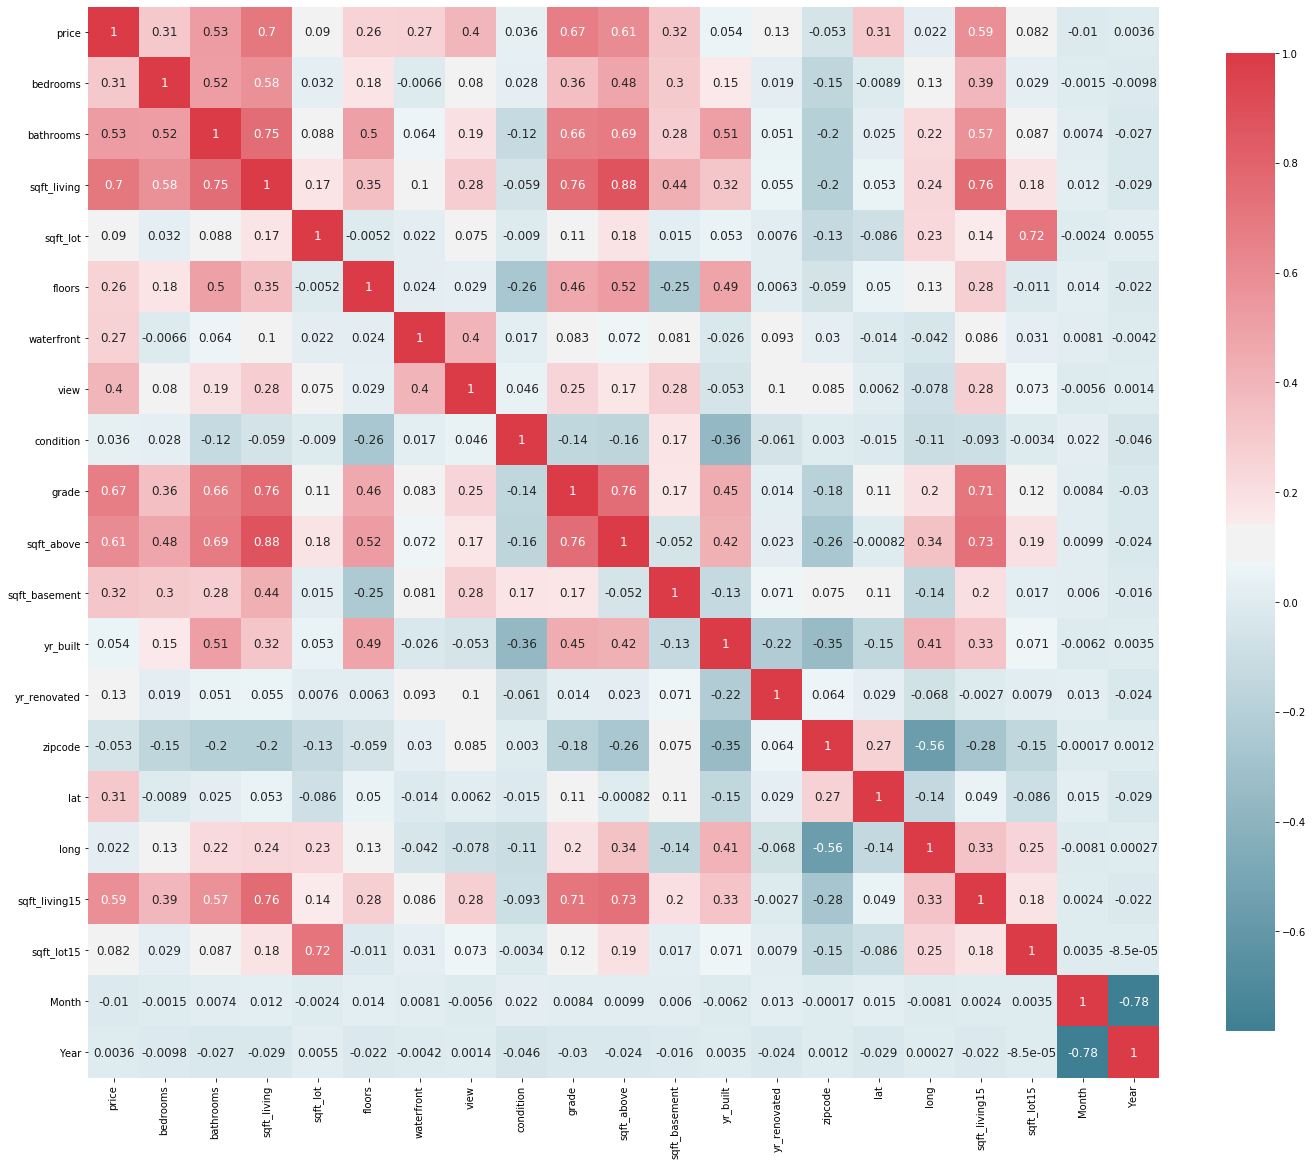

In [22]:
plot_correlation_map(df)

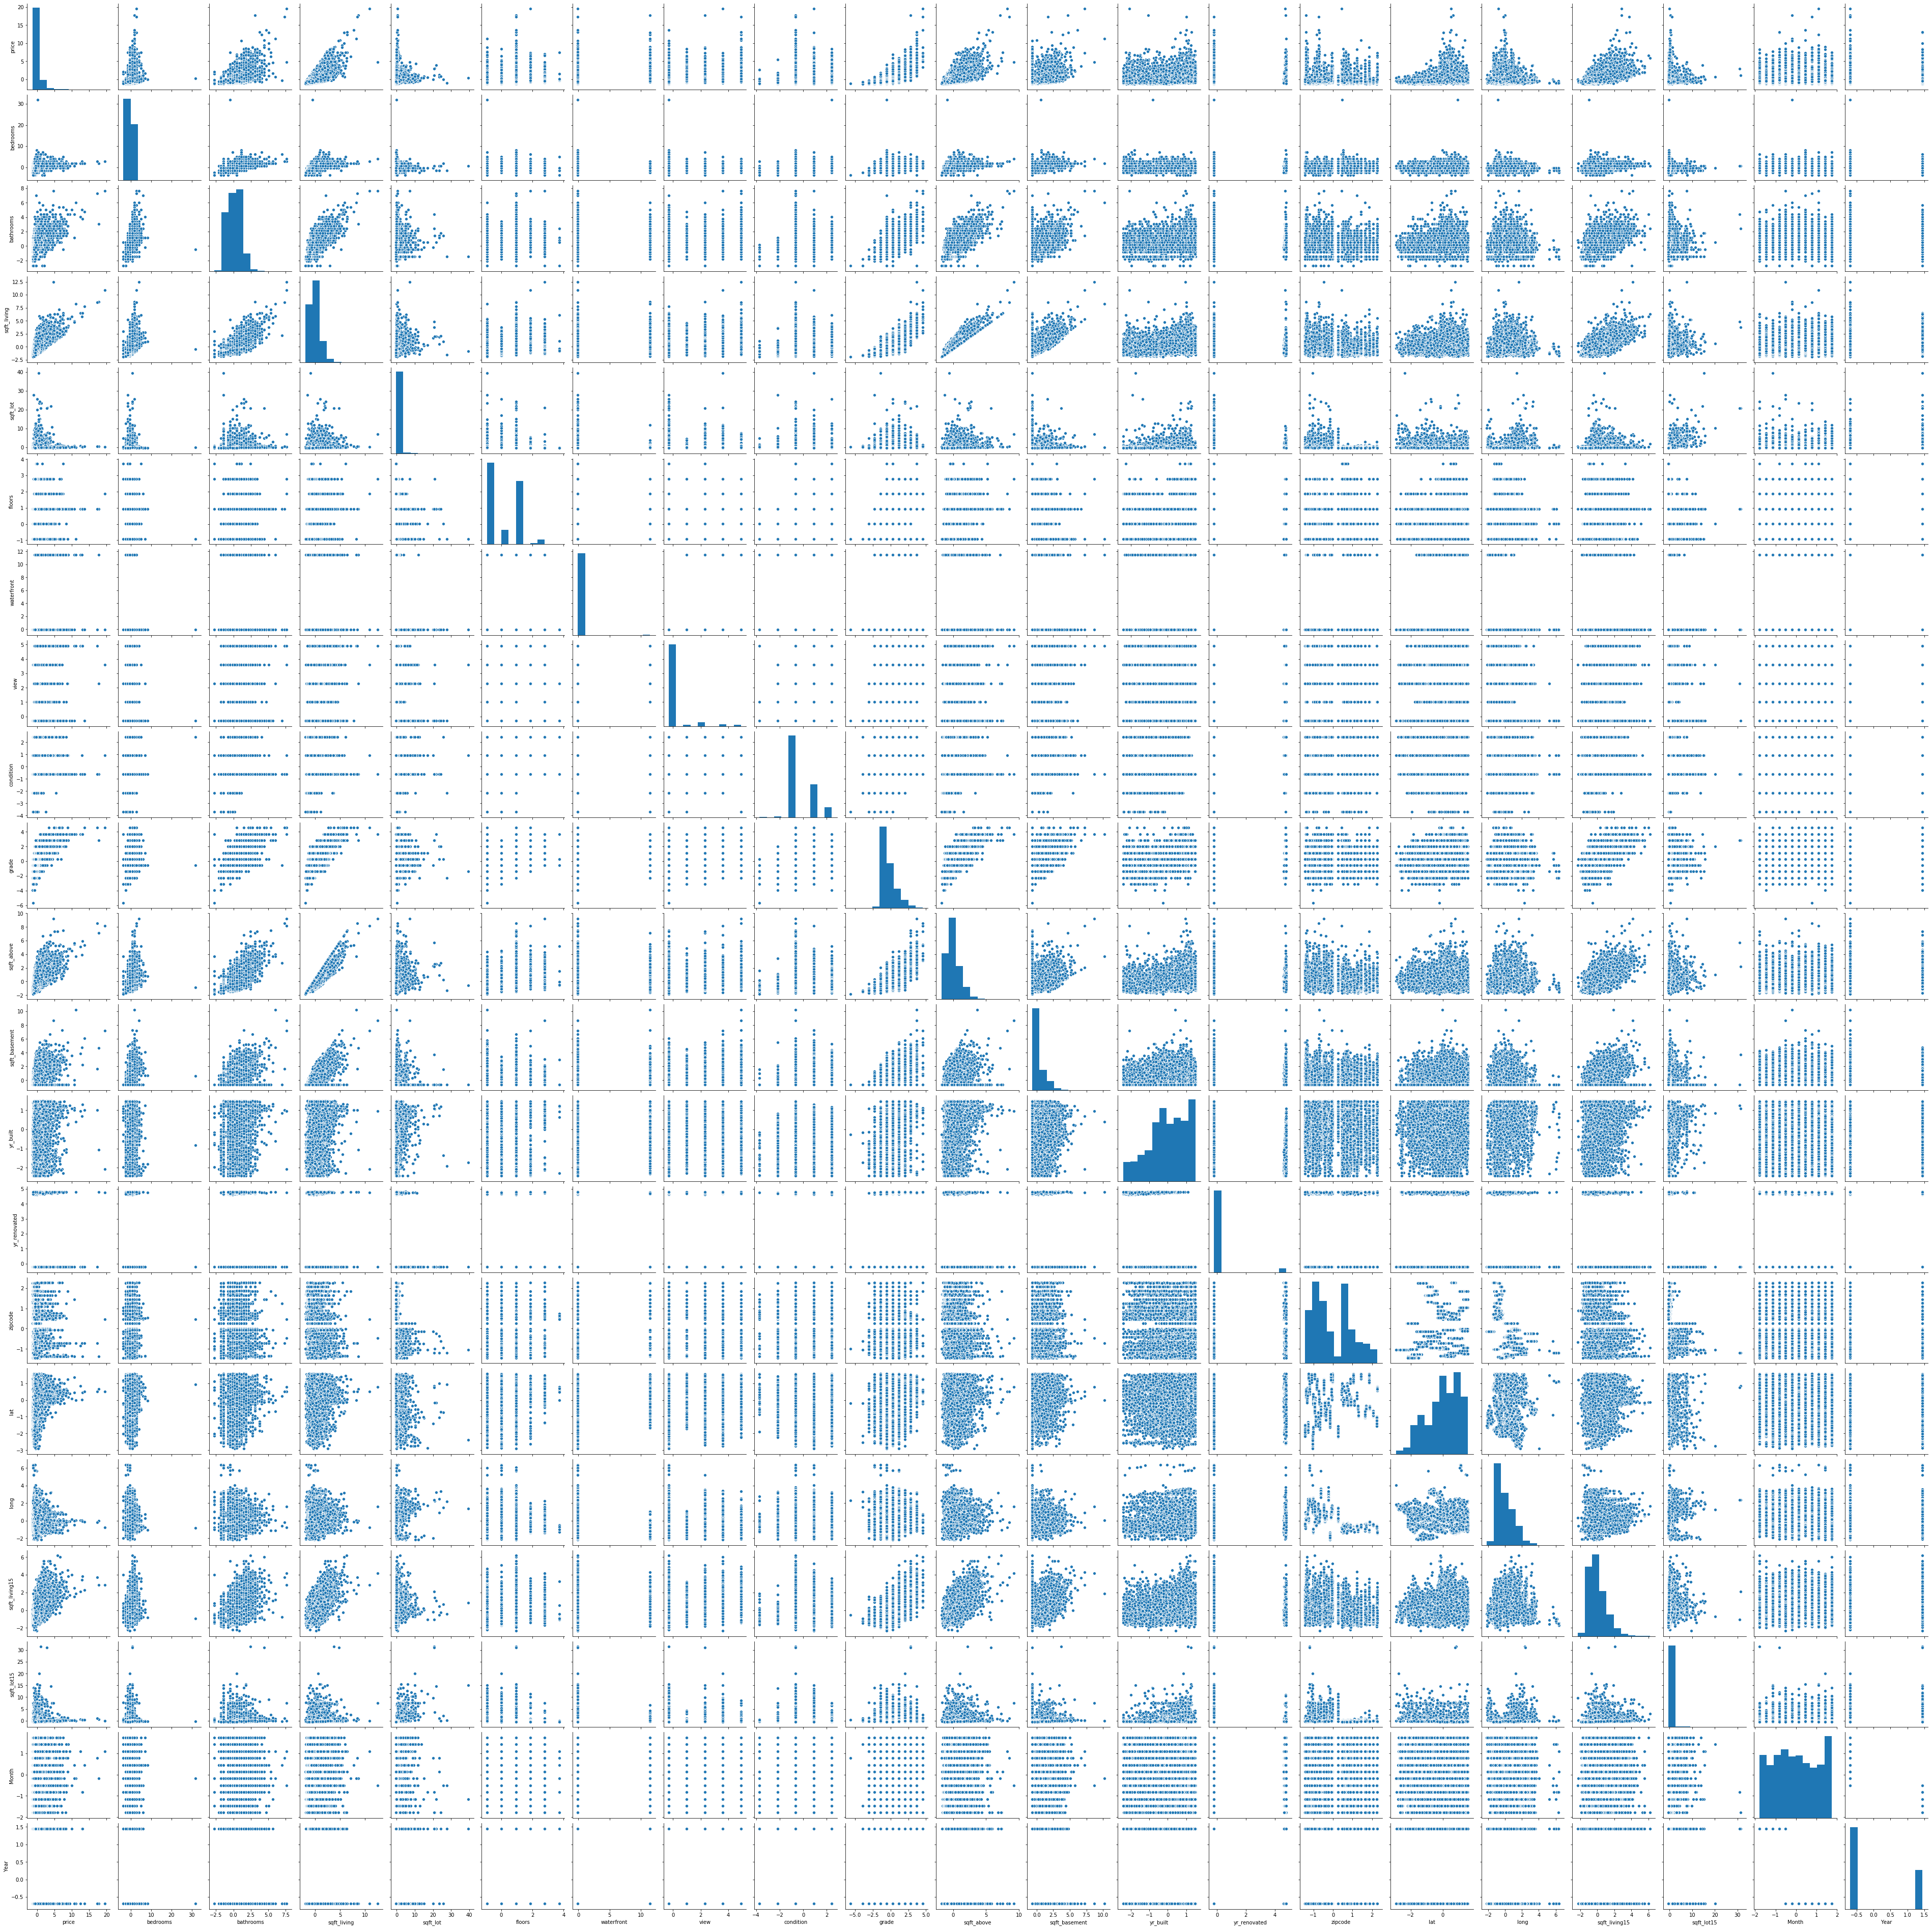

In [23]:
sns.pairplot(df)

# MULTI-LINEAR REGRESSION

In [24]:
X2= dp["sqft_living"]
y=dp['price']

In [25]:
x_multi, x_multi2, y_multi, y_multi2 = train_test_split(X2, y, test_size=0.35, random_state=40)  #splitting data
multi=LinearRegression()
x_multi=np.array(x_multi)
y_multi=np.array(y_multi)

x_multi=x_multi.reshape(-1, 1)
y_multi=y_multi.reshape(-1, 1)

multi.fit(x_multi, y_multi)
x_multi2=np.array(x_multi2)
x_multi2=x_multi2.reshape(-1,1)
predicted_multi = multi.predict(x_multi2)

In [26]:
X2=np.array(X2)
X2=X2.reshape(-1,1)
X2

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

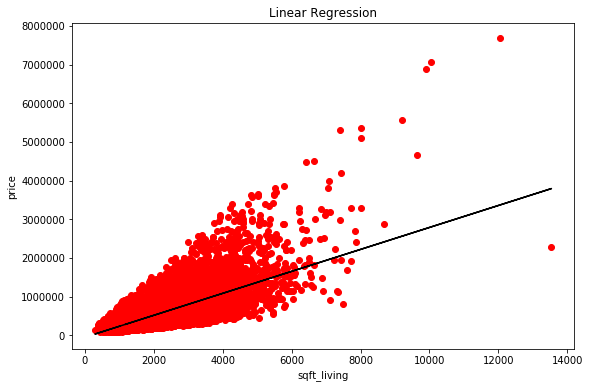

In [27]:
plt.figure(figsize=(9,6))
plt.scatter(X2,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X2,multi.predict(X2),color="k")

In [28]:
print("MSE: ", metrics.mean_squared_error(y_multi2, predicted_multi))
print("R squared: ", metrics.r2_score(y_multi2,predicted_multi))

MSE:  62902408306.86502
R squared:  0.4996528488387417


# FIRST POLYNOMIAL REGRESSION

In [29]:
Poly = PolynomialFeatures(degree = 2)
x_poly=Poly.fit_transform(x_multi)

In [30]:
poly_model=LinearRegression()
poly_model.fit(x_poly, y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
x_test_poly=Poly.fit_transform(x_multi2)
poly_predicted=poly_model.predict(x_test_poly)

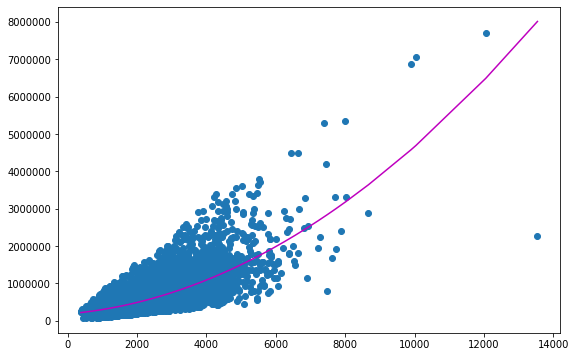

In [32]:
import operator
plt.figure(figsize=(9,6))
plt.scatter(x_multi,y_multi)
poly_pred = poly_model.predict(x_poly)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_multi,poly_pred), key=lambda elem: elem[0])
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

In [33]:
print("Mean squared error: ",mean_squared_error(y_multi2,poly_predicted))
print("R2 score: ",metrics.r2_score(y_multi2,poly_predicted))

Mean squared error:  57753648354.73143
R2 score:  0.5406078367860325


# MULTI-LINEAR REGRESSION

In [34]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15',"Year"]].values
y = df['price'].values
x_linear, x_linear2, y_linear, y_linear2 = train_test_split(X,y,test_size=1/5)

In [35]:
std = StandardScaler()
X = std.fit_transform(X)

In [36]:
model=LinearRegression()
x_linear.reshape(-1, 1)
y_linear.reshape(-1, 1)
model.fit(x_linear,y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
predicted=model.predict(x_linear2)


print("Mean squared error: ",mean_squared_error(y_linear2,predicted))
print("R2 score: ",metrics.r2_score(y_linear2,predicted))

Mean squared error:  0.3872841306962208
R2 score:  0.5959080450999262


# SECOND POLYNOMIAL REGRESSION

In [38]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(x_linear)
X_test_poly = poly.transform(x_linear2)
model.fit(X_train_poly,y_linear)
score_poly = model.score(X_train_poly,y_linear)

In [39]:
print(score_poly)

0.8259954914119945


The second polynomial regression, the one with multiple features, has the highest score compared to other models tested in this project